In [1]:
# Load libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from res import set_default, show_scatterplot, plot_bases
import matplotlib.pyplot as plt

In [2]:
set_default()

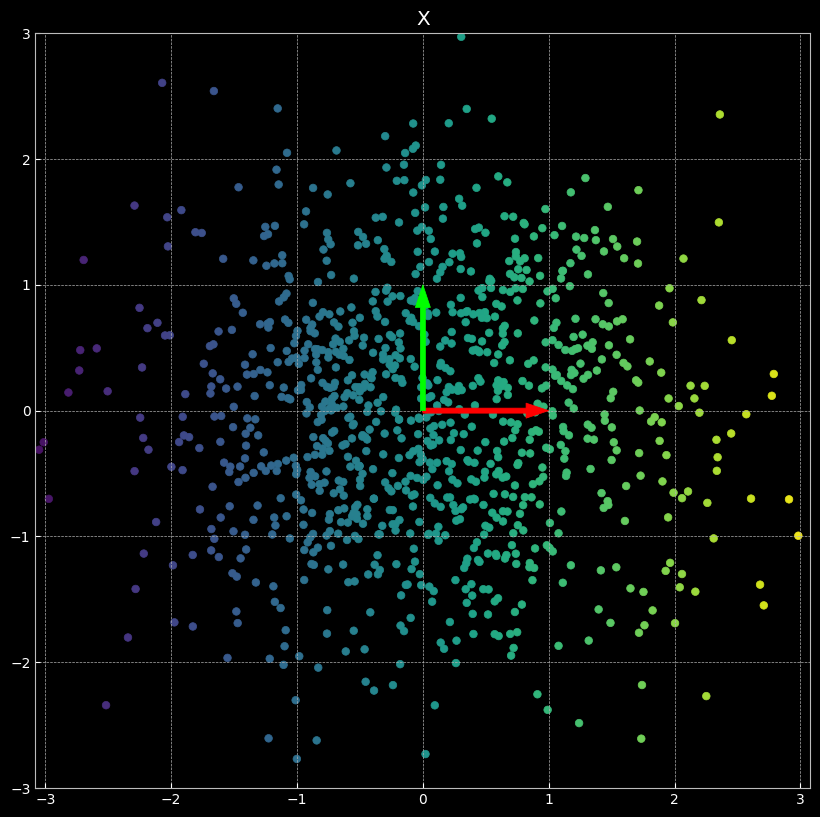

In [3]:
x = torch.randn(1000, 2)
colors = x[:, 0]

show_scatterplot(x, colors, title='X')
OI = torch.cat((torch.zeros(2, 2), torch.eye(2)))
plot_bases(OI)

# 1. Linear transformation by hand 

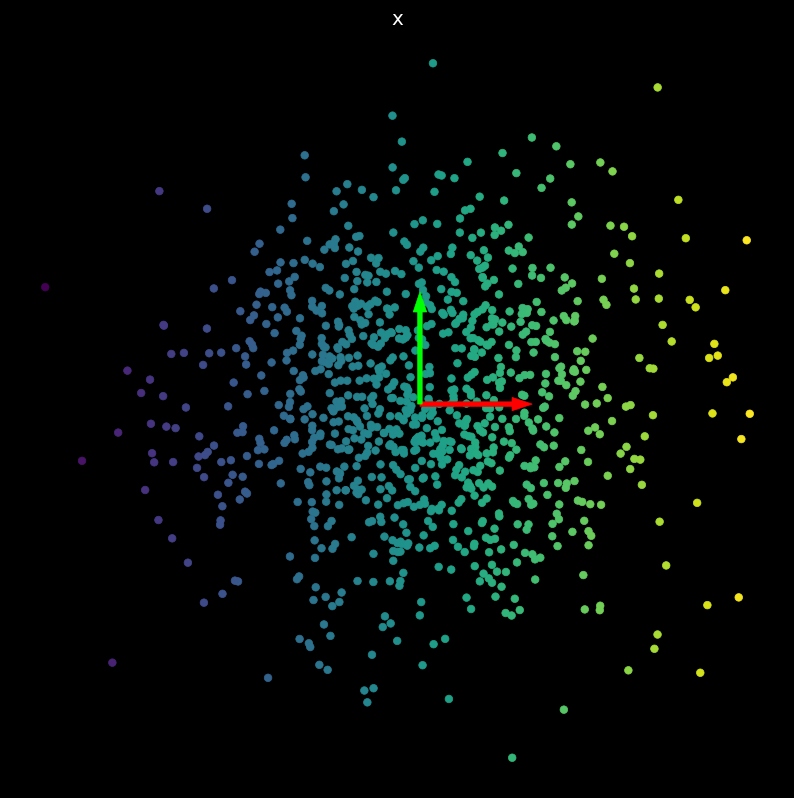

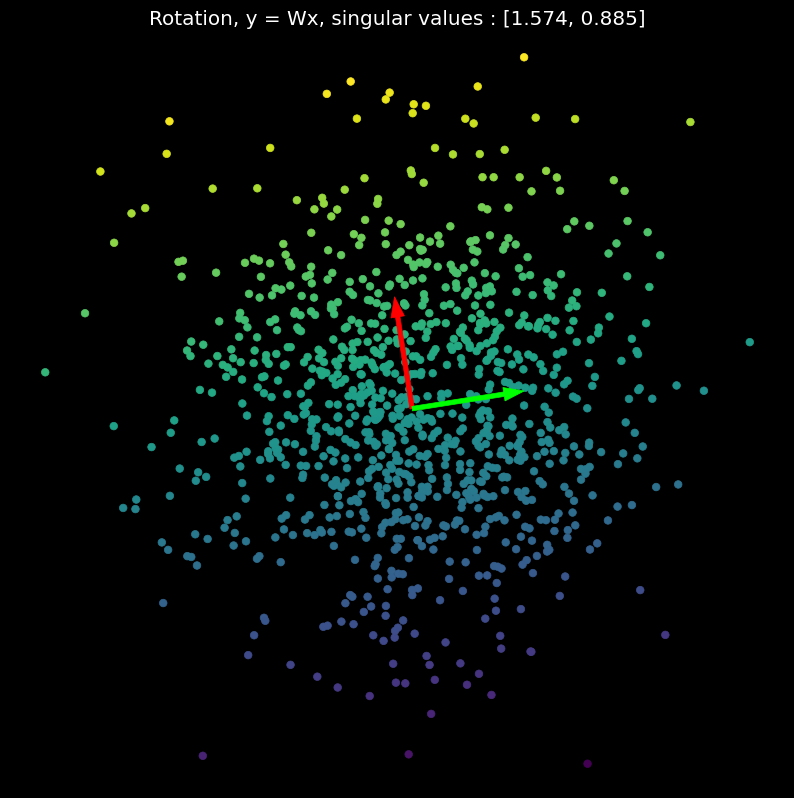

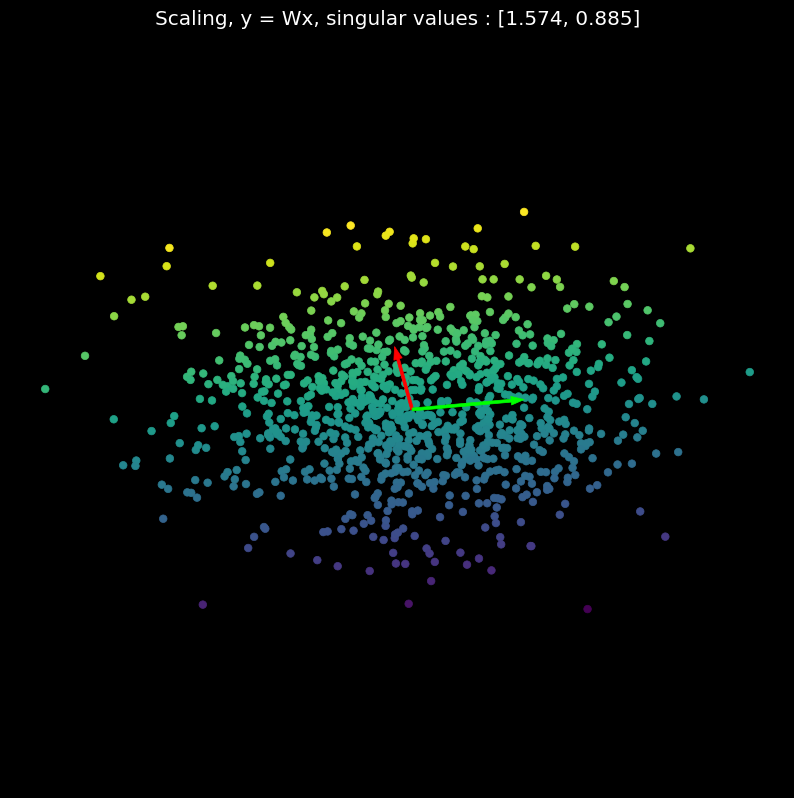

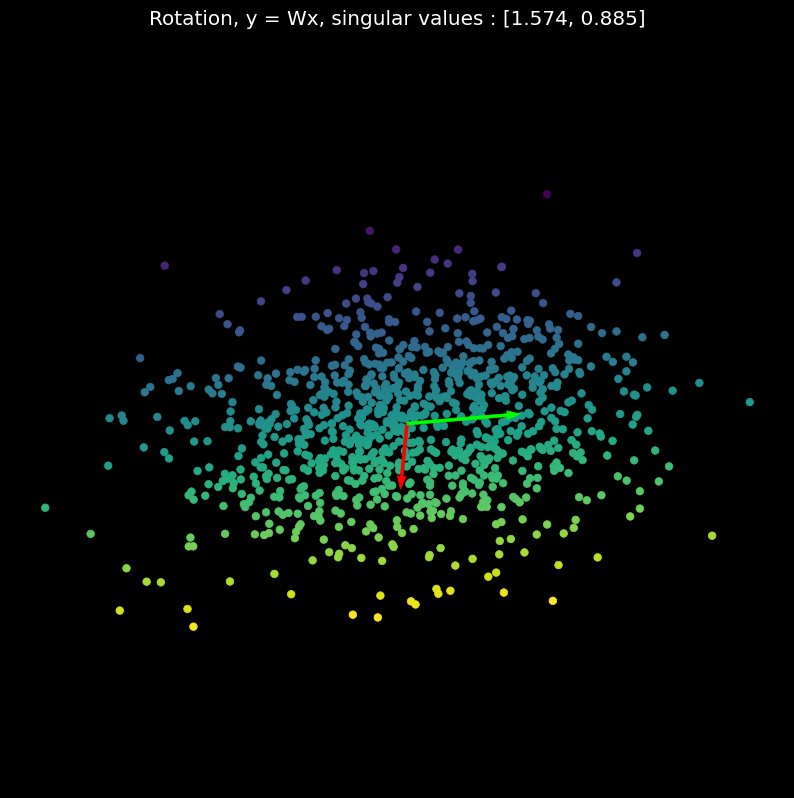

In [39]:
w = torch.randn(2,2)

y = x @ w
new_OI = OI @ w

show_scatterplot(x, colors, title='x')
plot_bases(OI)


U,S,V_t = torch.svd(w) 
for mat, text in [(U, "Rotation"), (U * S, "Scaling"), ((U * S) @ V_t, "Rotation")]:
    show_scatterplot(x @ mat, colors, title=text + ', y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))  
    plot_bases(OI @ mat)



# 2. Linear transformation with Pytorch

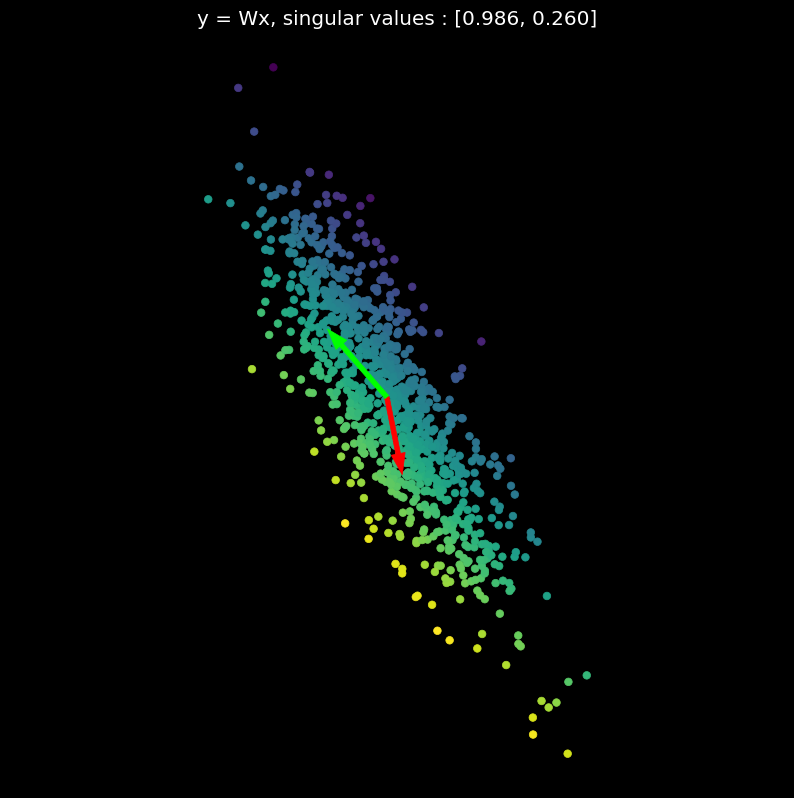

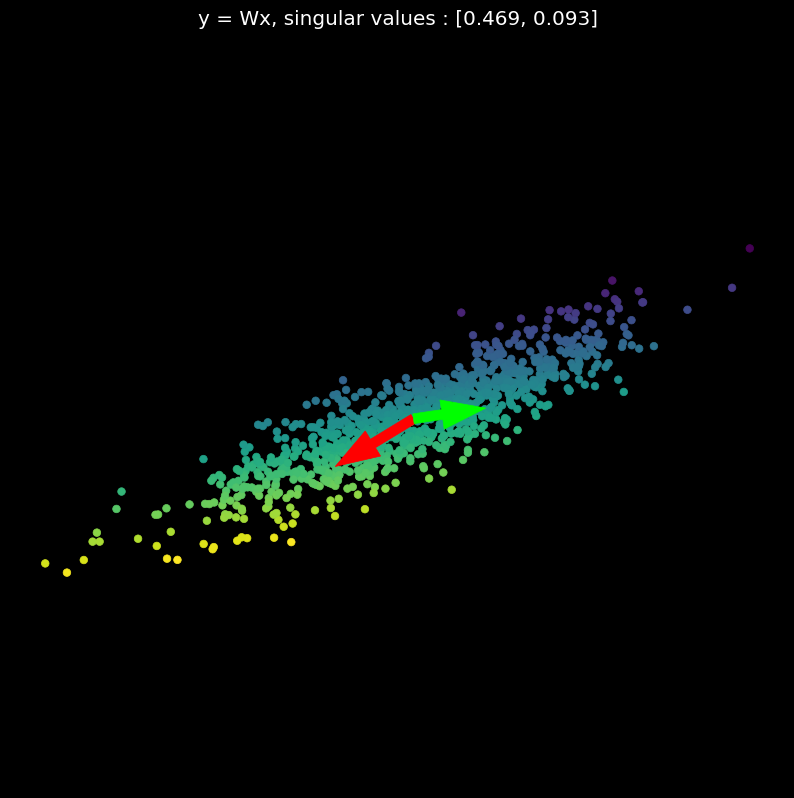

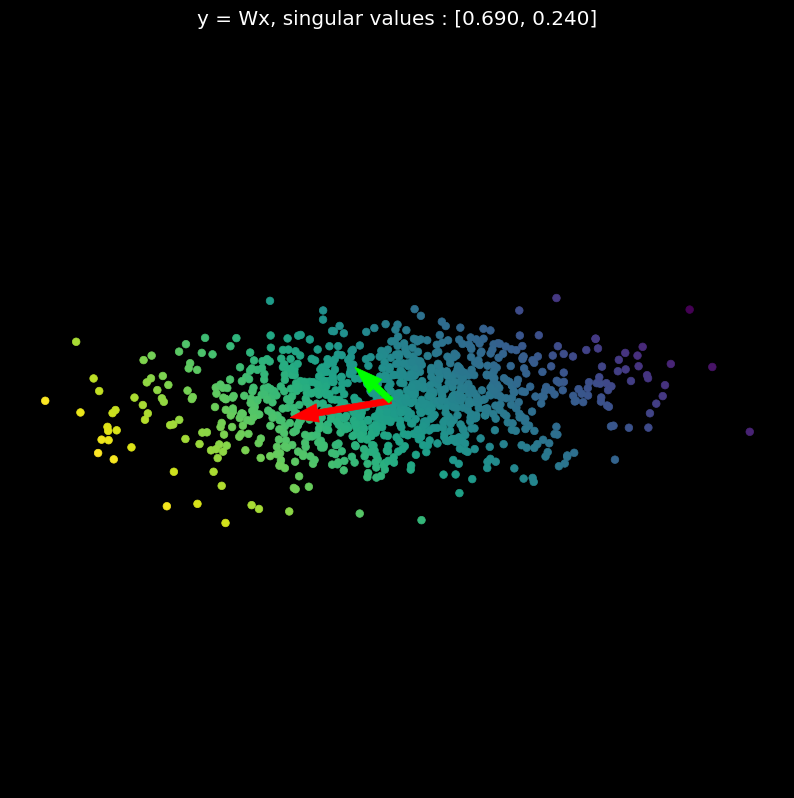

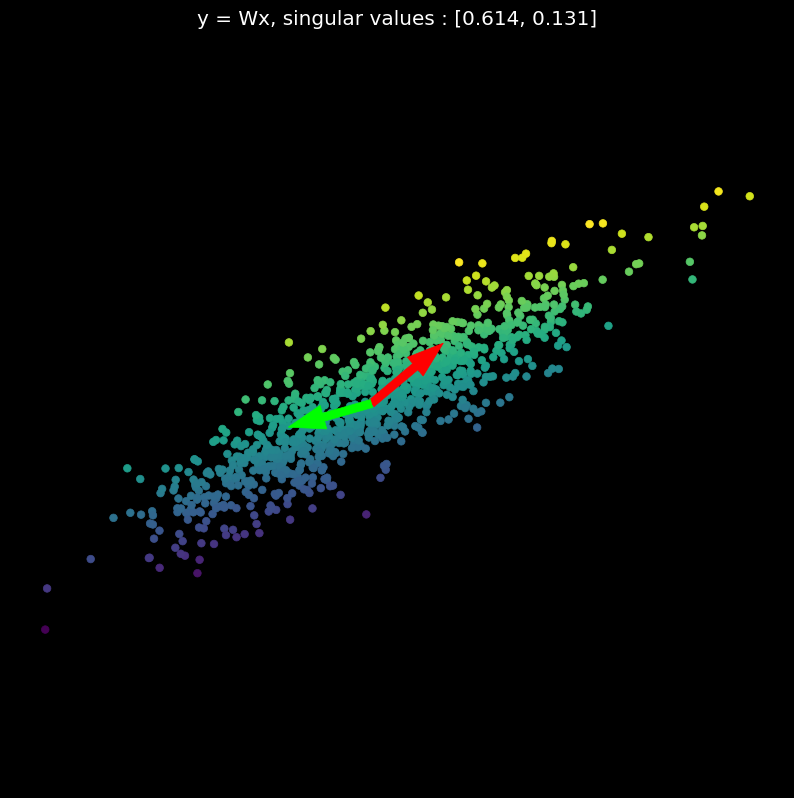

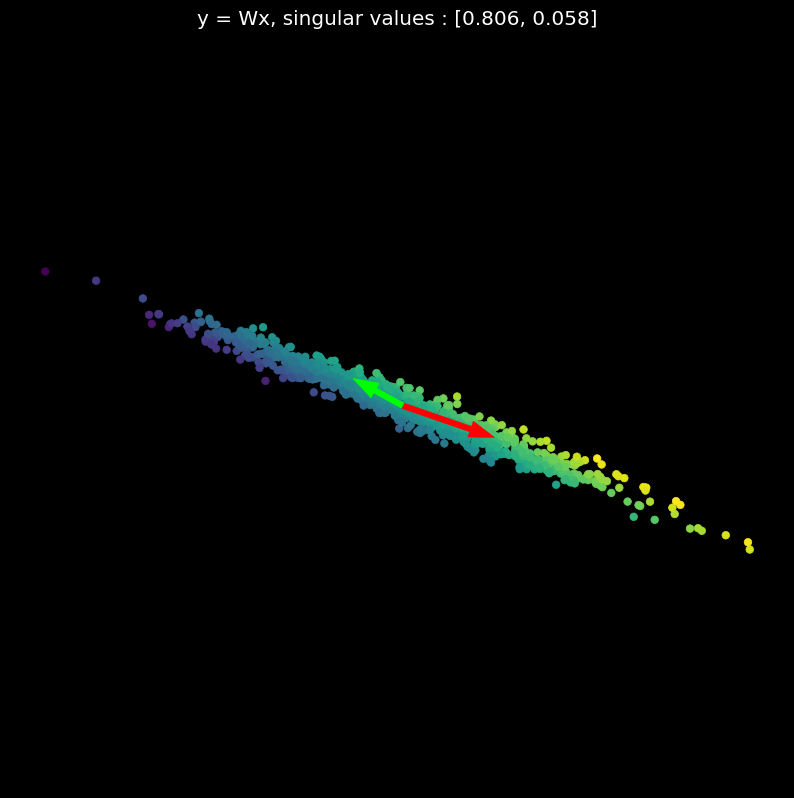

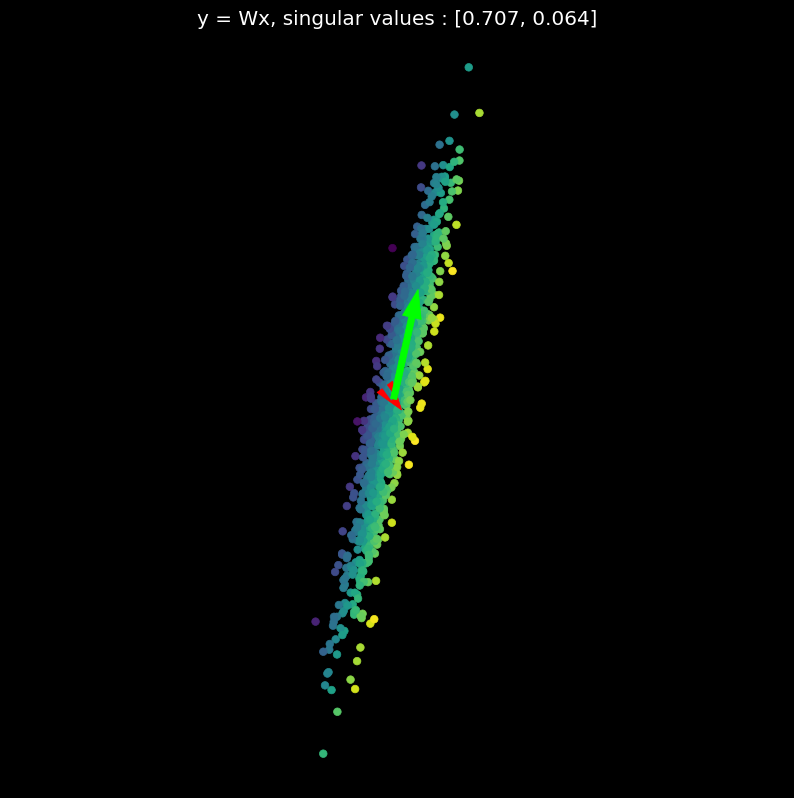

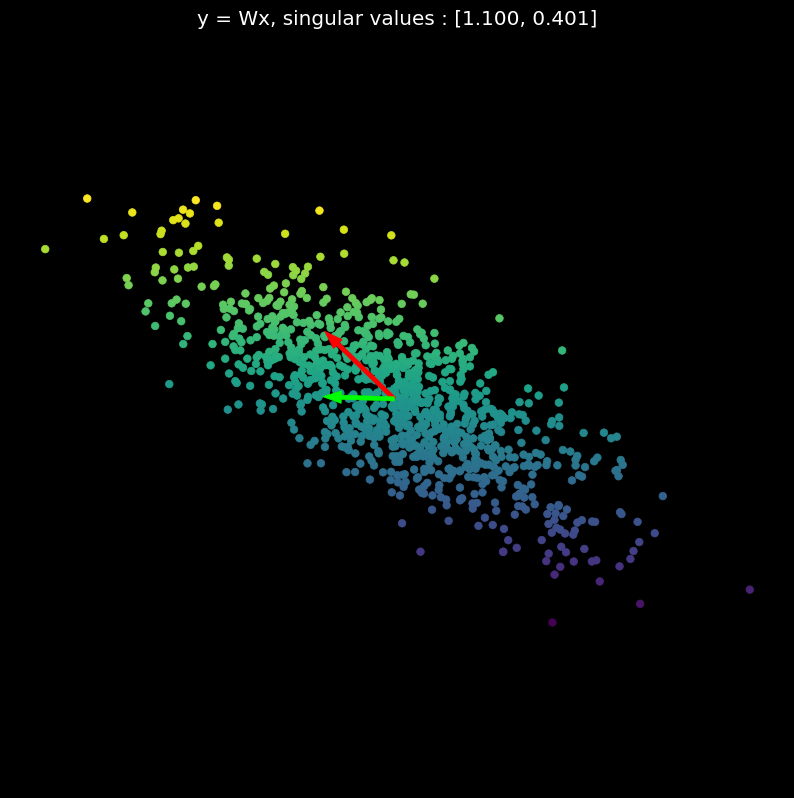

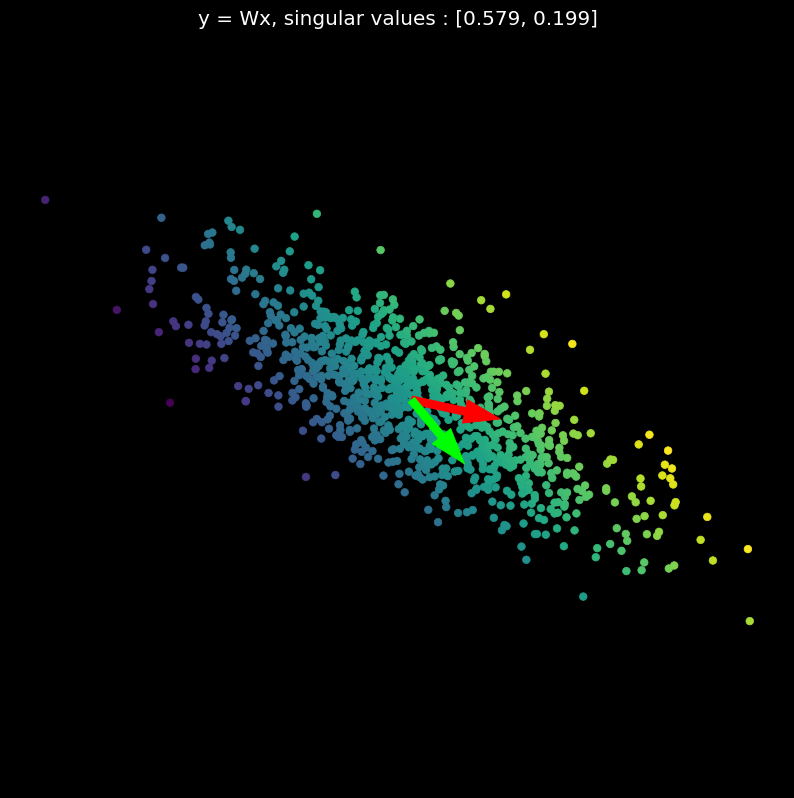

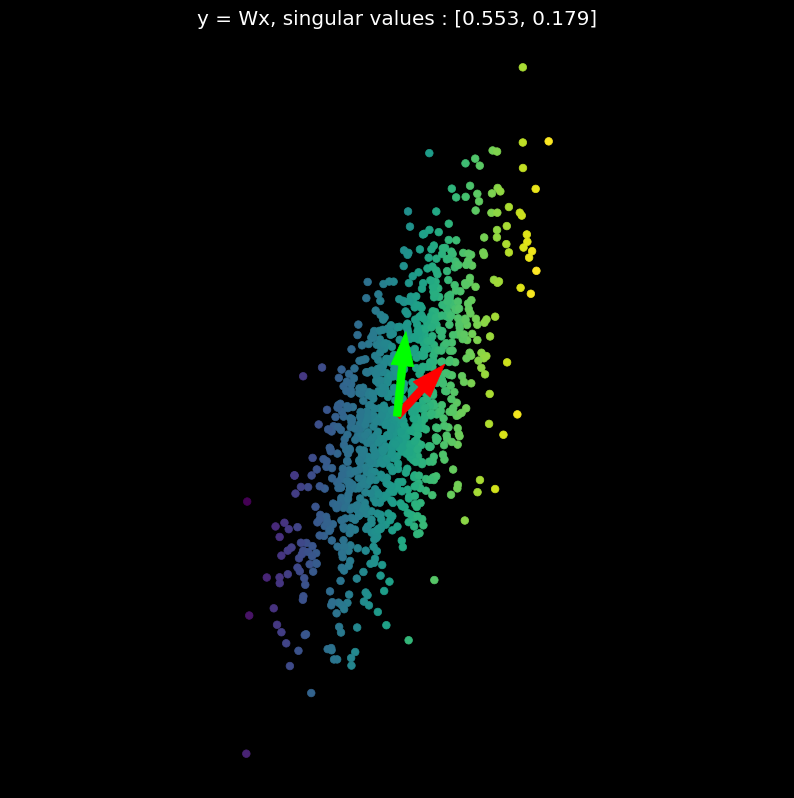

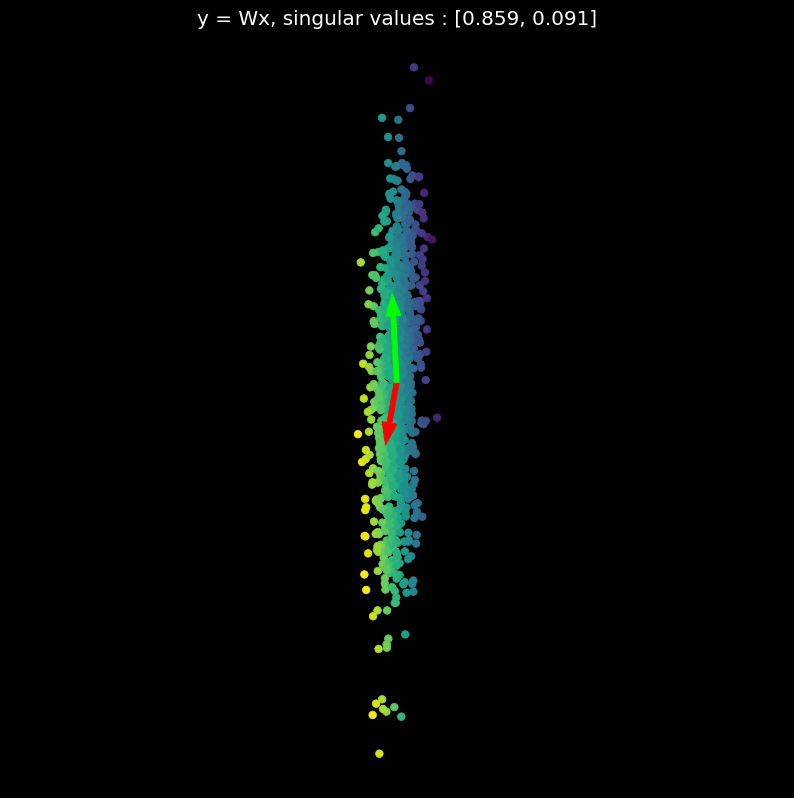

In [44]:
for i in range(10):
    model = nn.Linear(2,2, bias=False)

    with torch.no_grad():
        y = model(x)
        new_OI = model(OI)
        u, S, v_t = torch.svd(model.weight)

        show_scatterplot(y, colors, title='y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))
        plot_bases(new_OI)


# 3. Non-linear transformation with Pytorch 

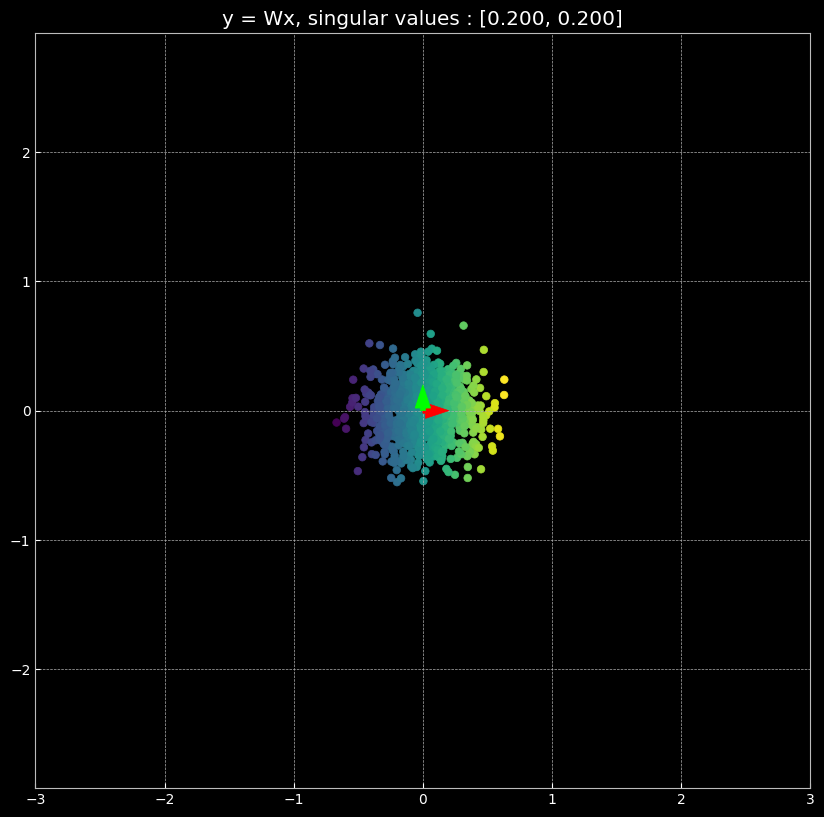

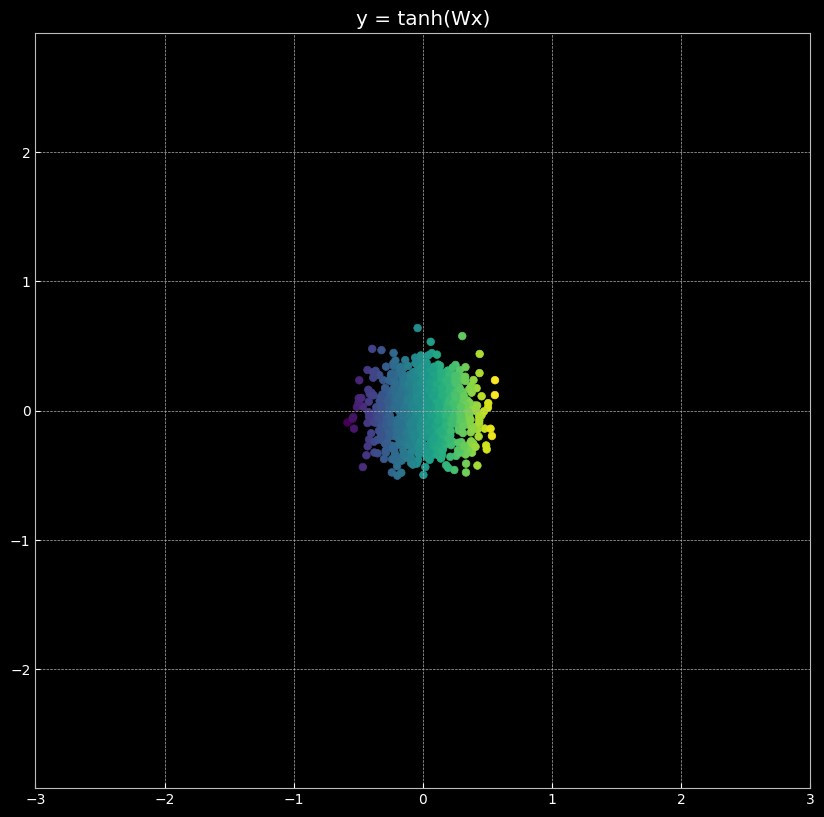

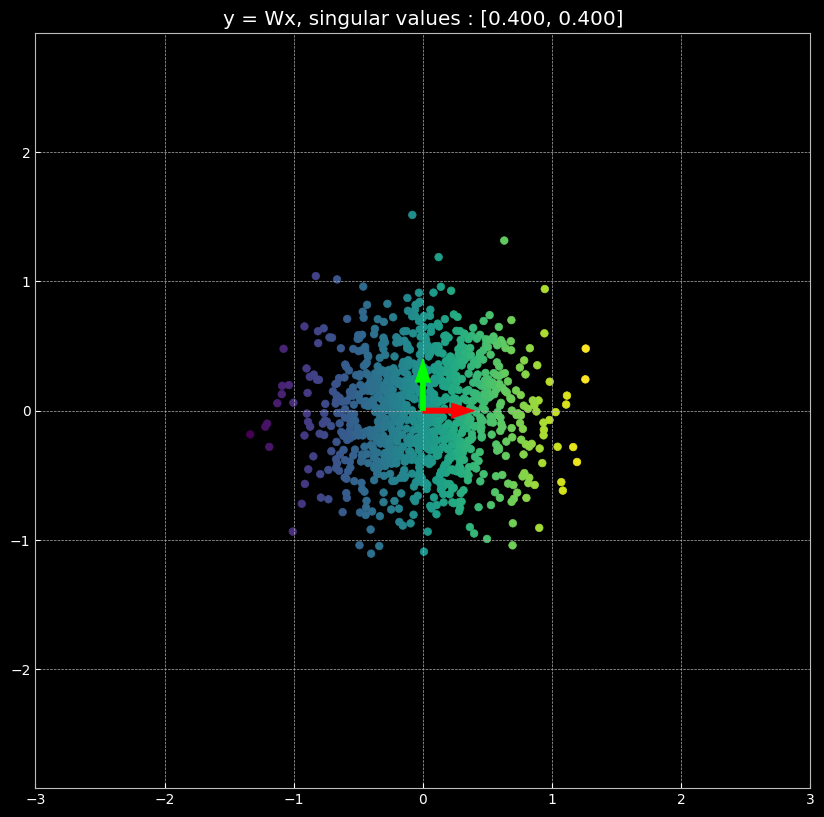

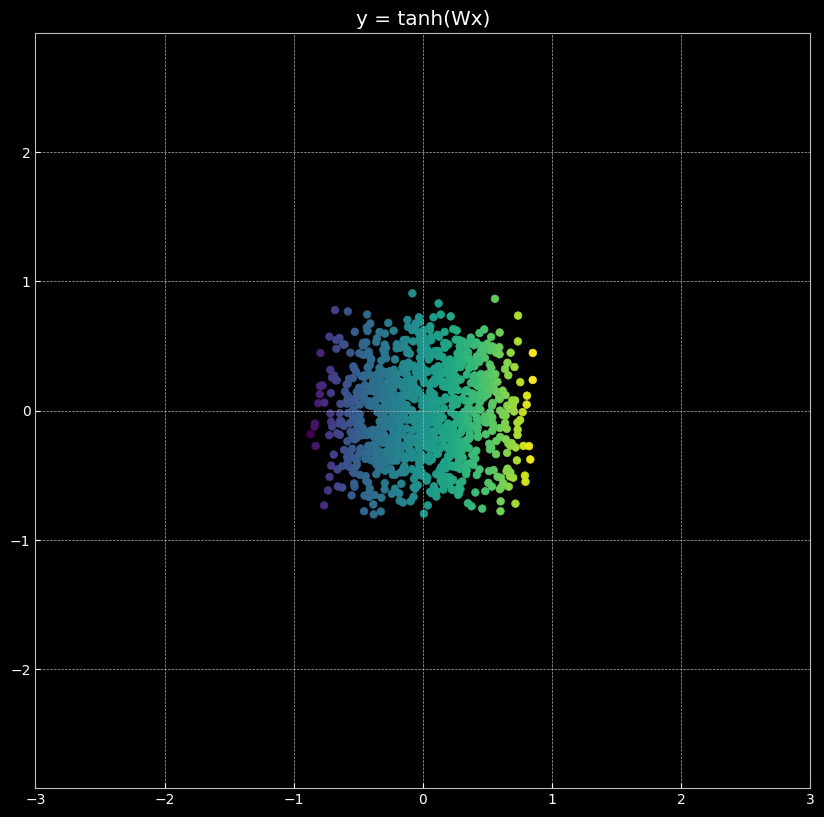

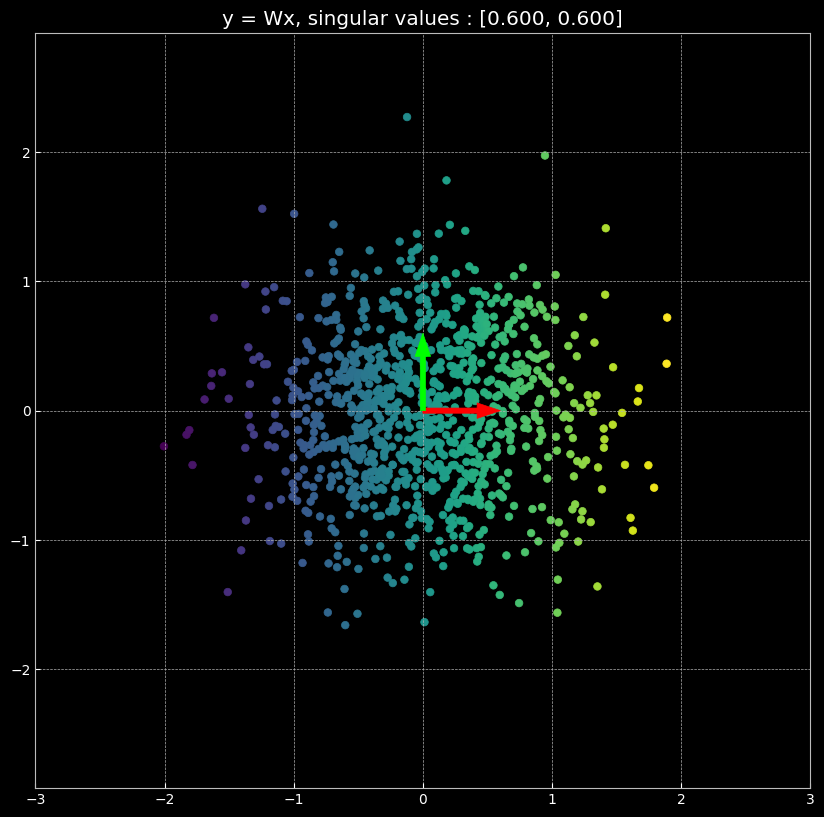

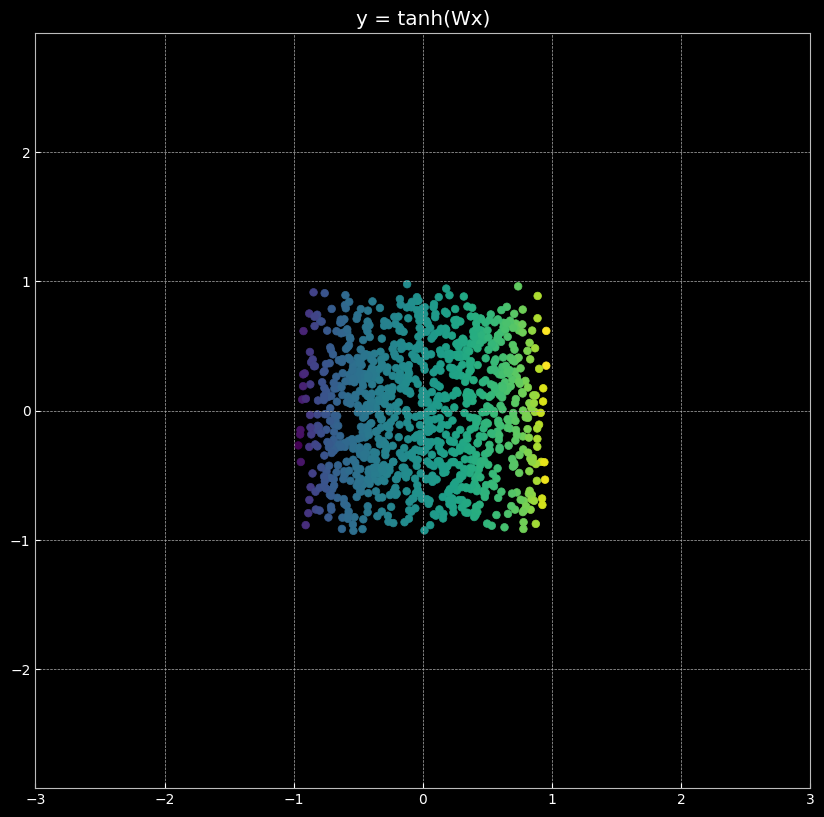

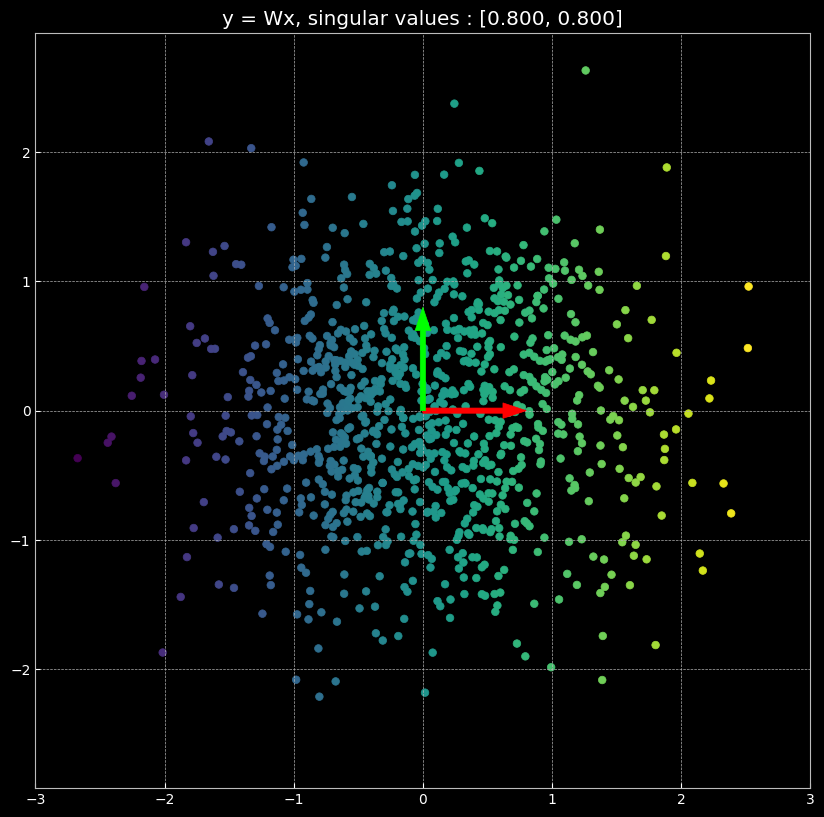

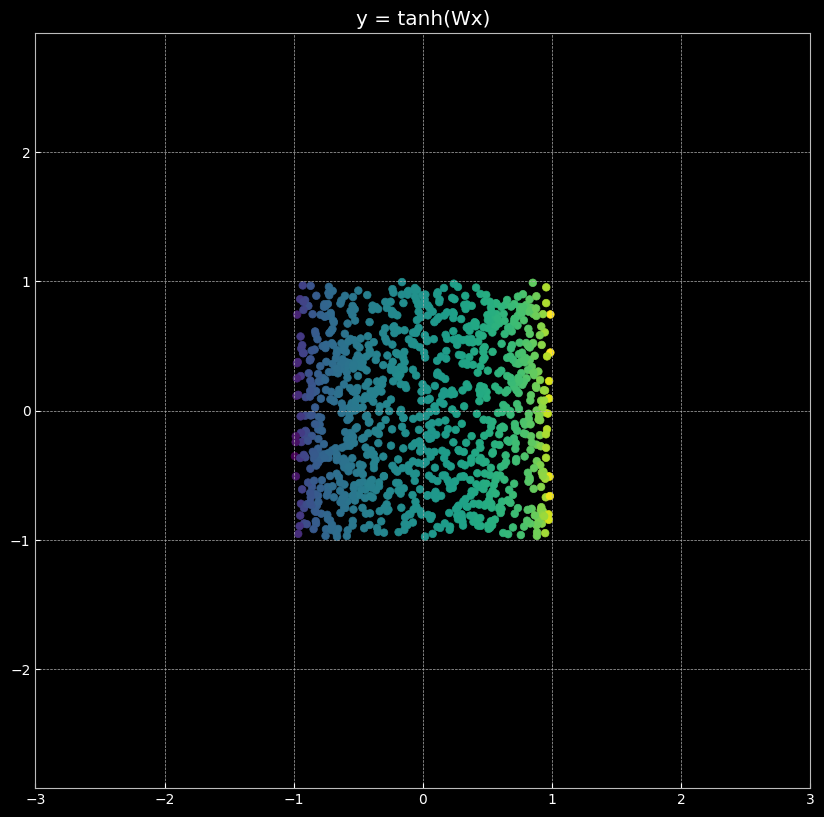

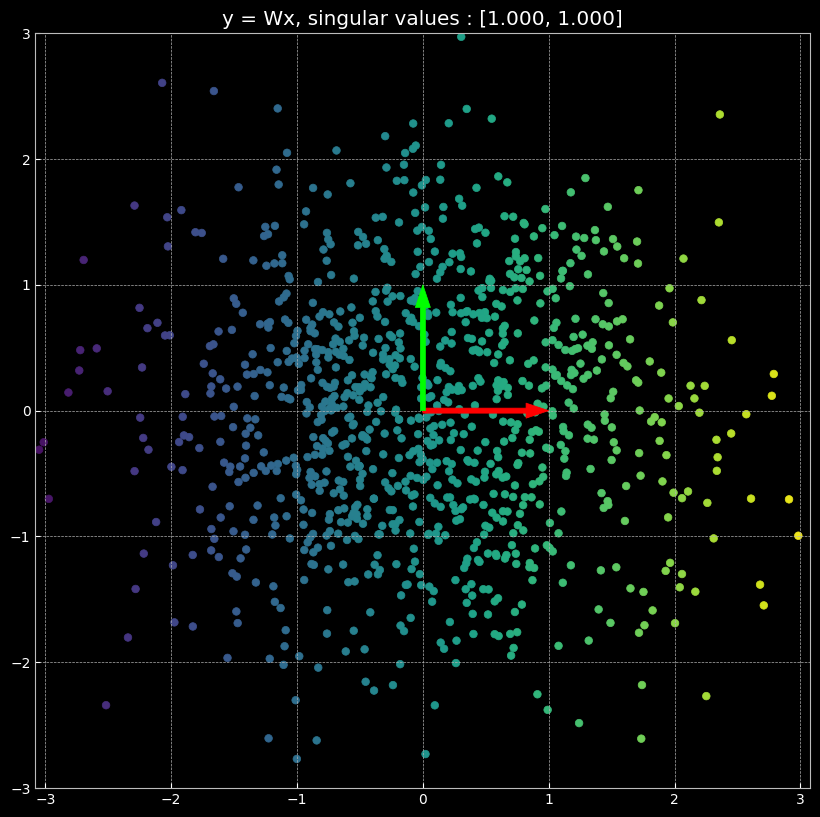

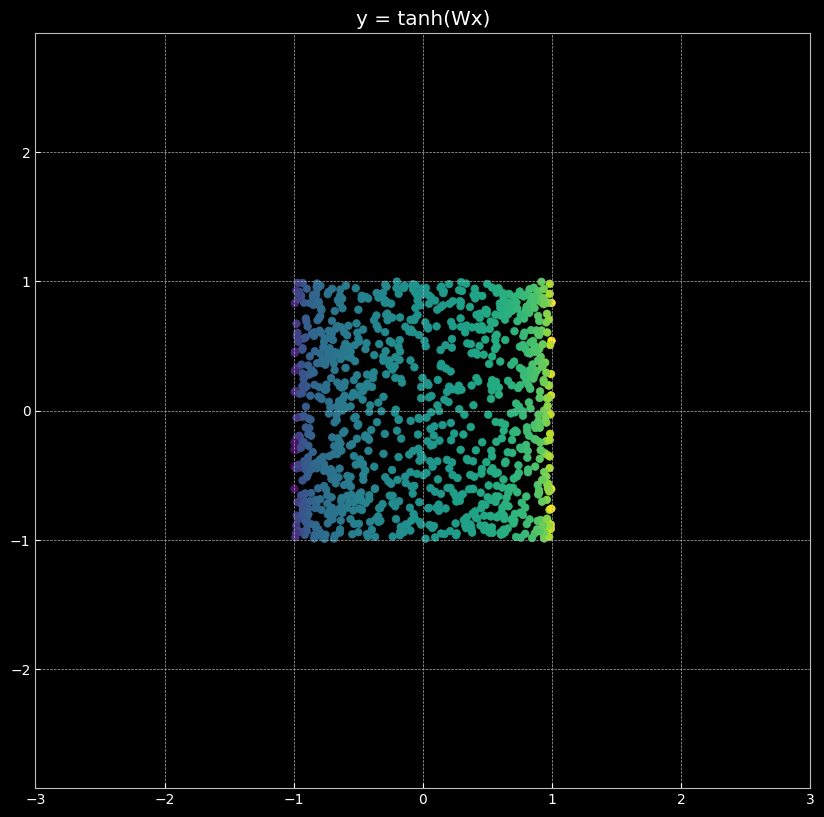

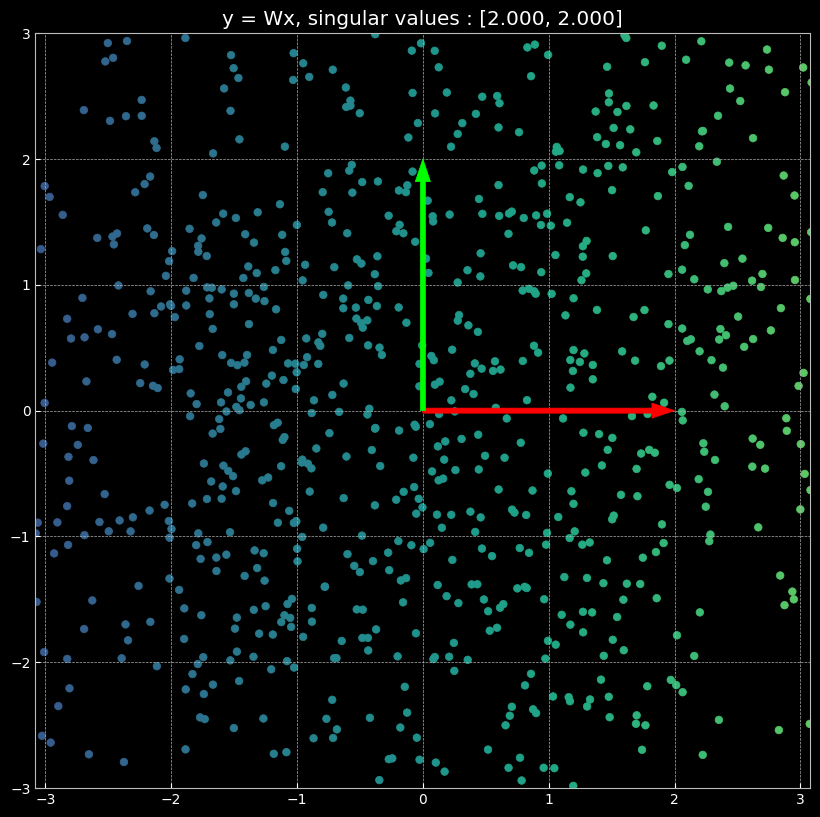

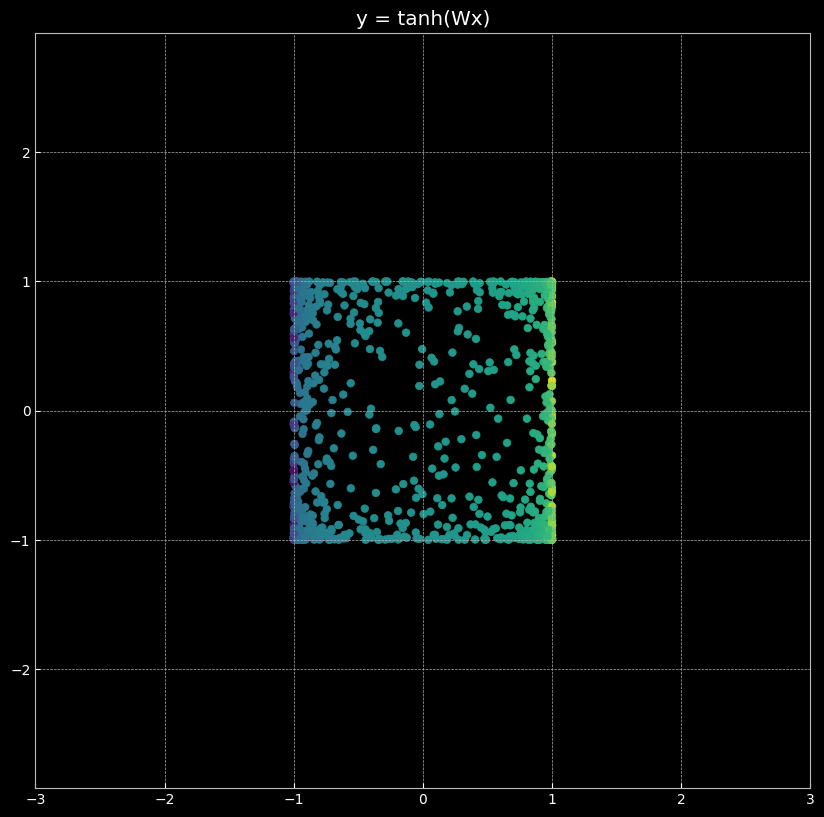

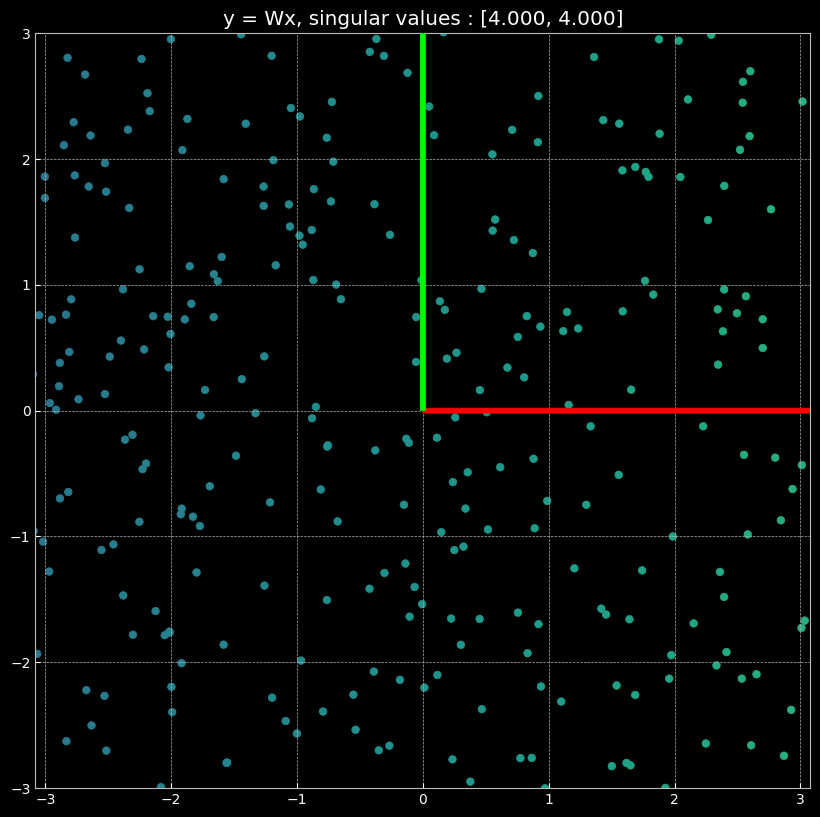

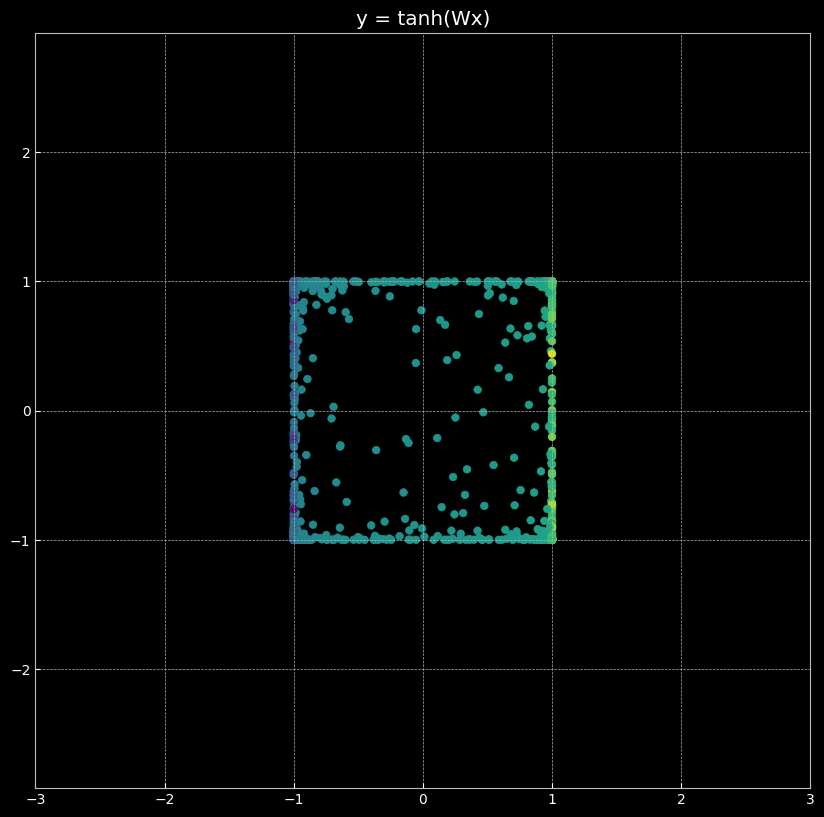

In [4]:
for i in [0.2, 0.4, 0.6, 0.8, 1, 2, 4]:

    model = nn.Sequential(
        nn.Linear(2,2, bias=False),
        nn.Tanh()
    )

    model[0].weight = nn.Parameter(torch.eye(2,2) * i)

    with torch.no_grad():
        y = model(x)

        W = model[0].weight
        u, S, v_t = torch.svd(W)

        show_scatterplot(x @ W, colors, title='y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))
        plot_bases(OI @ W)
        show_scatterplot(y, colors, title='y = tanh(Wx)')

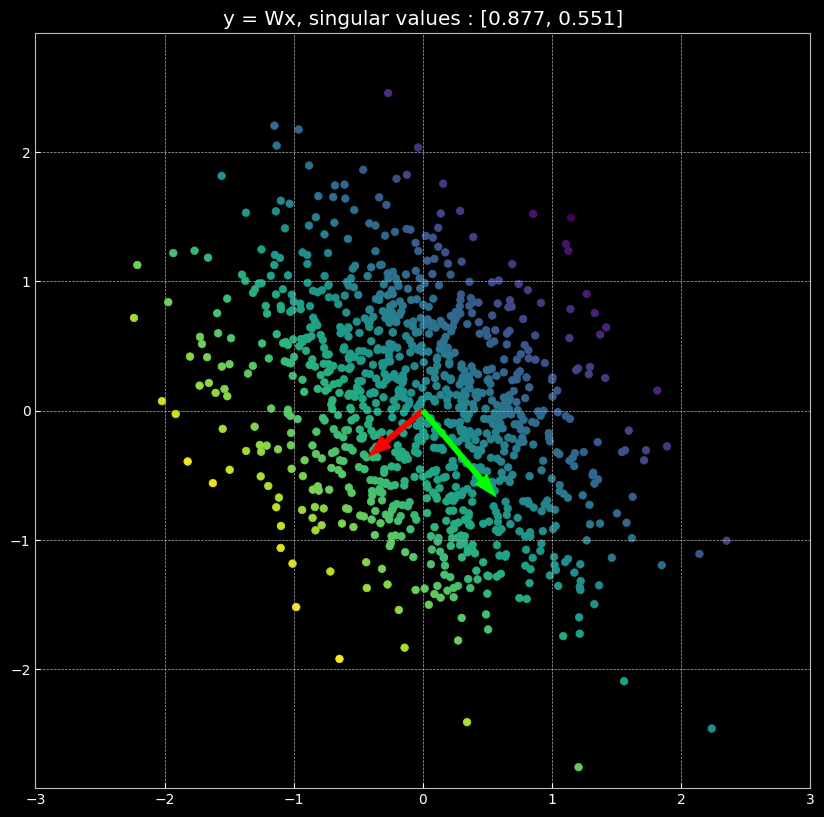

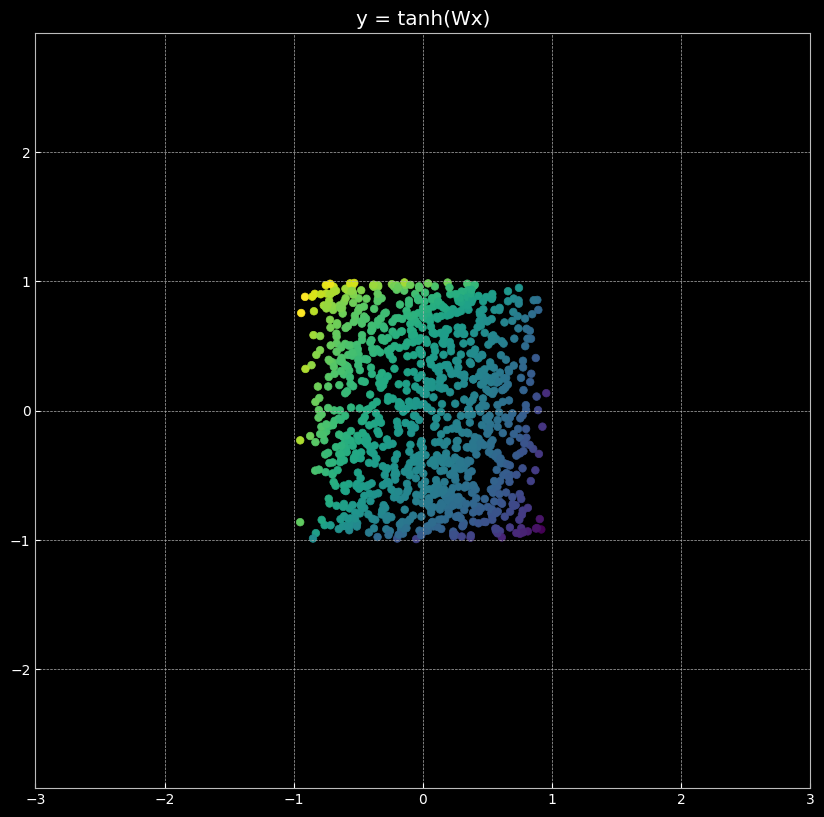

In [5]:
for i in range(1):

    model = nn.Sequential(
        nn.Linear(2,2, bias=False),
        nn.Tanh()
    )

    with torch.no_grad():
        y = model(x)

        W = model[0].weight
        u, S, v_t = torch.svd(W)



        show_scatterplot(x @ W, colors, title='y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))
        plot_bases(OI @ W)
        show_scatterplot(y, colors, title='y = tanh(Wx)')
        

In [9]:
torch.tanh(torch.tensor([0.2, 0.4, 0.6, 0.8, 1, 1.5, 2, 2.5, 2.8]))

tensor([0.1974, 0.3799, 0.5370, 0.6640, 0.7616, 0.9051, 0.9640, 0.9866, 0.9926])

In [52]:
model = nn.Sequential(
    nn.Linear(2,2),
    nn.Tanh()
)
model

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Tanh()
)

In [56]:
model[0].weight

Parameter containing:
tensor([[ 0.4794,  0.6111],
        [-0.3136, -0.4847]], requires_grad=True)

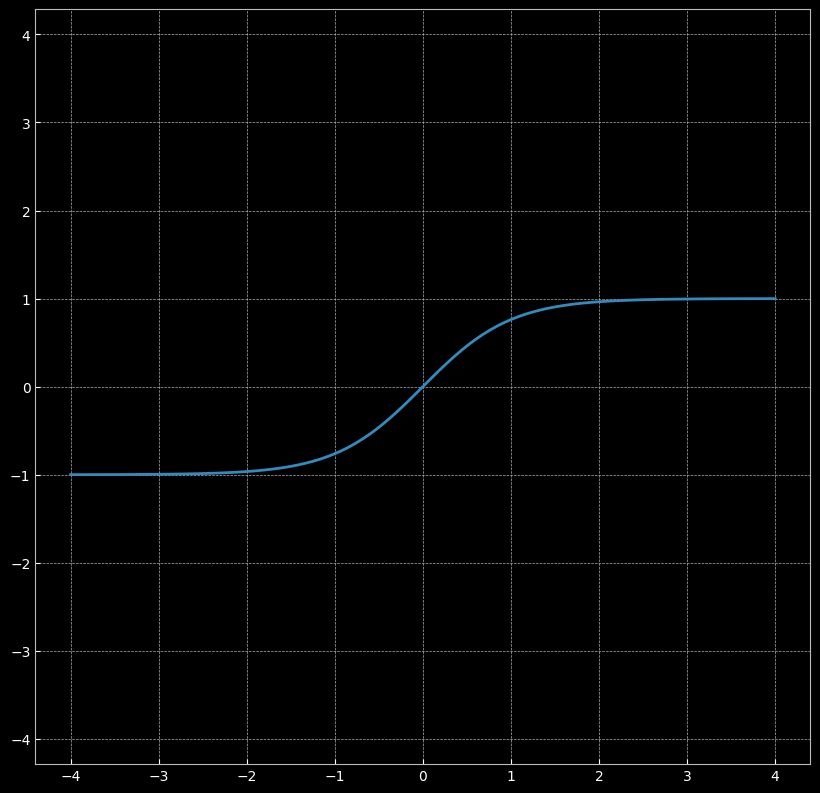

In [32]:
z = torch.linspace(-4, 4, 100)
a = torch.tanh(z)
plt.plot(z, a)
plt.axis("equal")
plt.grid(which="minor")

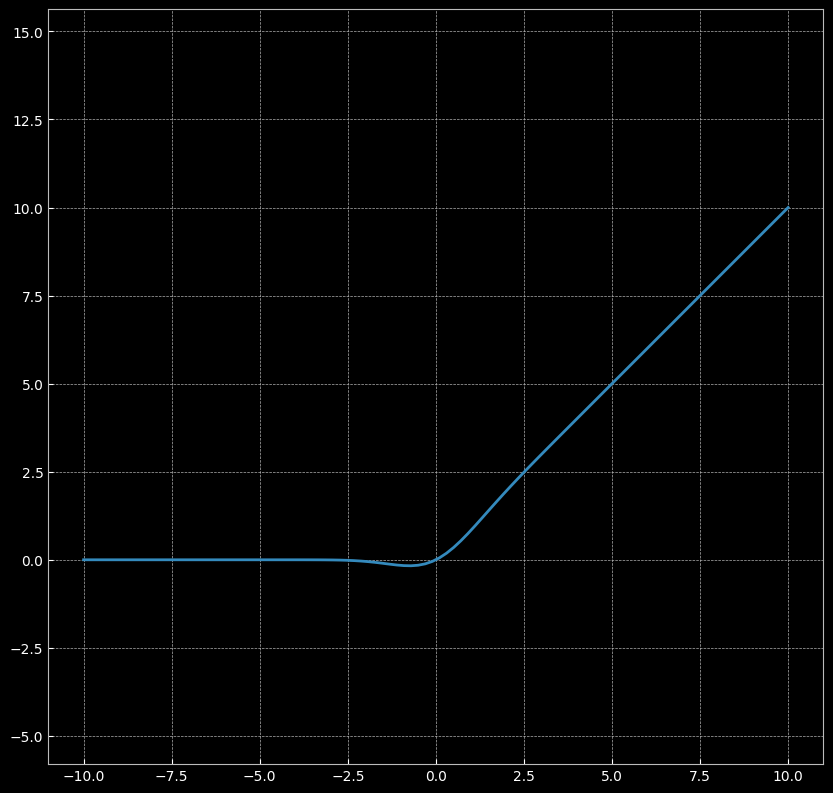

In [7]:
z = torch.linspace(-10, 10, 100)
a = F.gelu(z)
plt.axis("equal")
plt.plot(z, a)

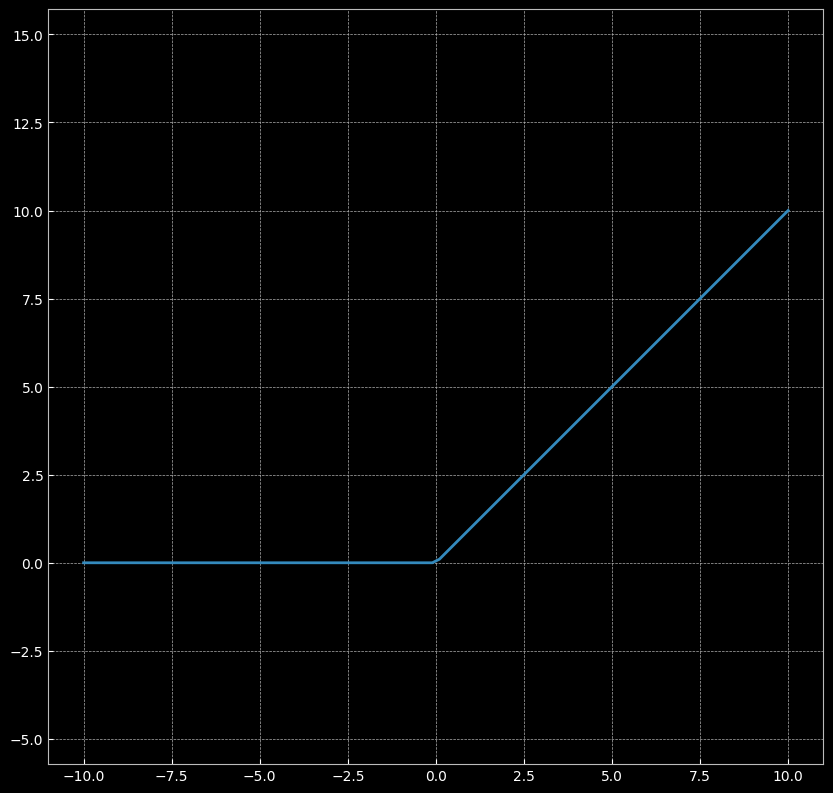

In [8]:
z = torch.linspace(-10, 10, 100)
a = F.relu(z)
plt.axis("equal")
plt.plot(z, a)

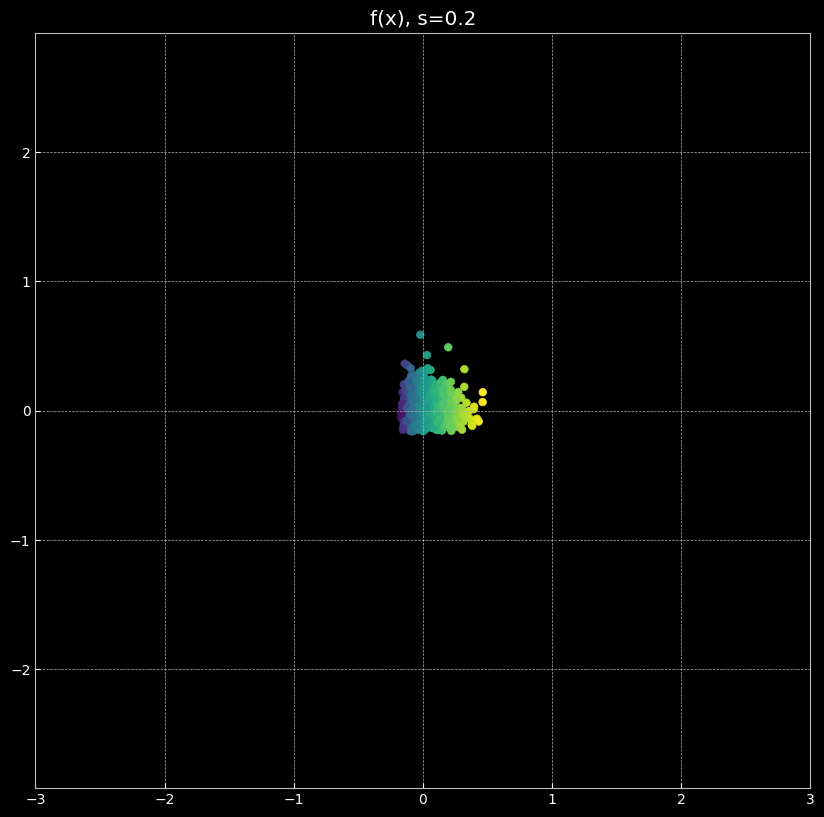

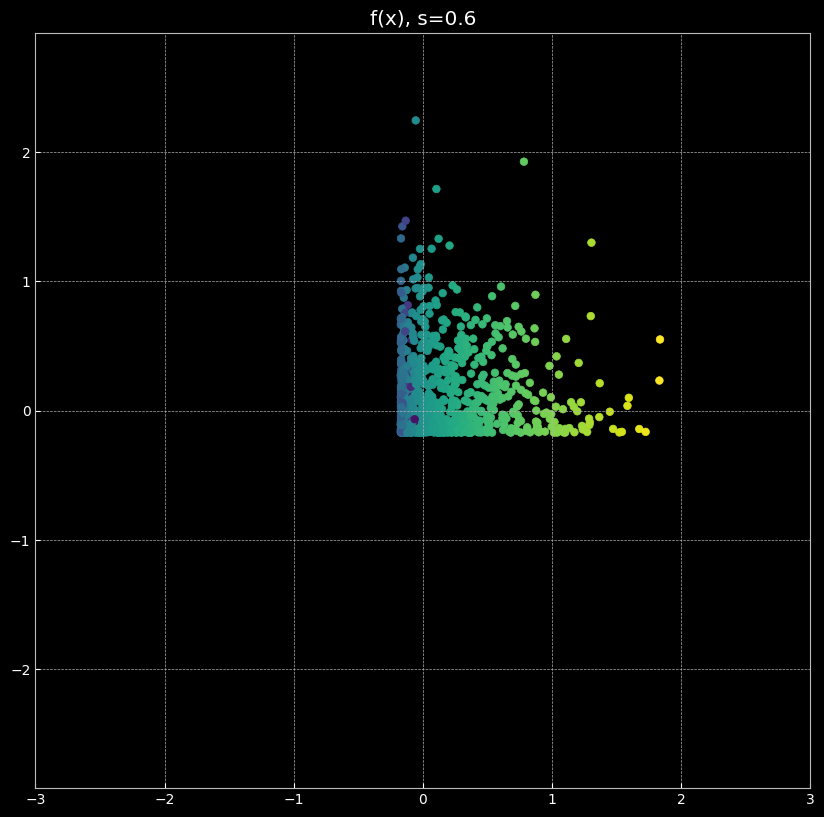

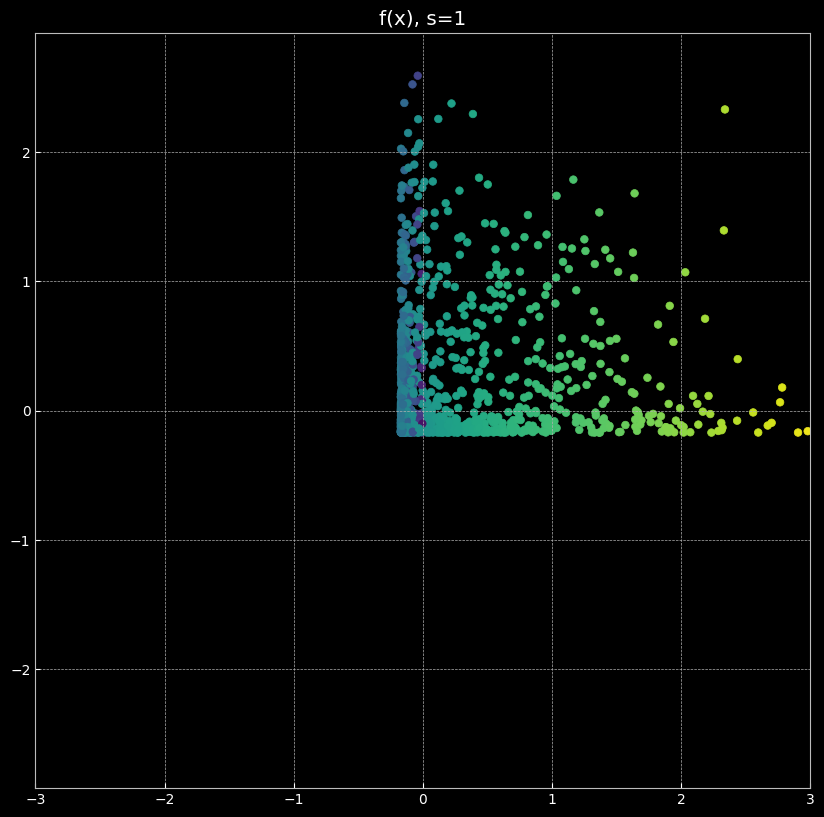

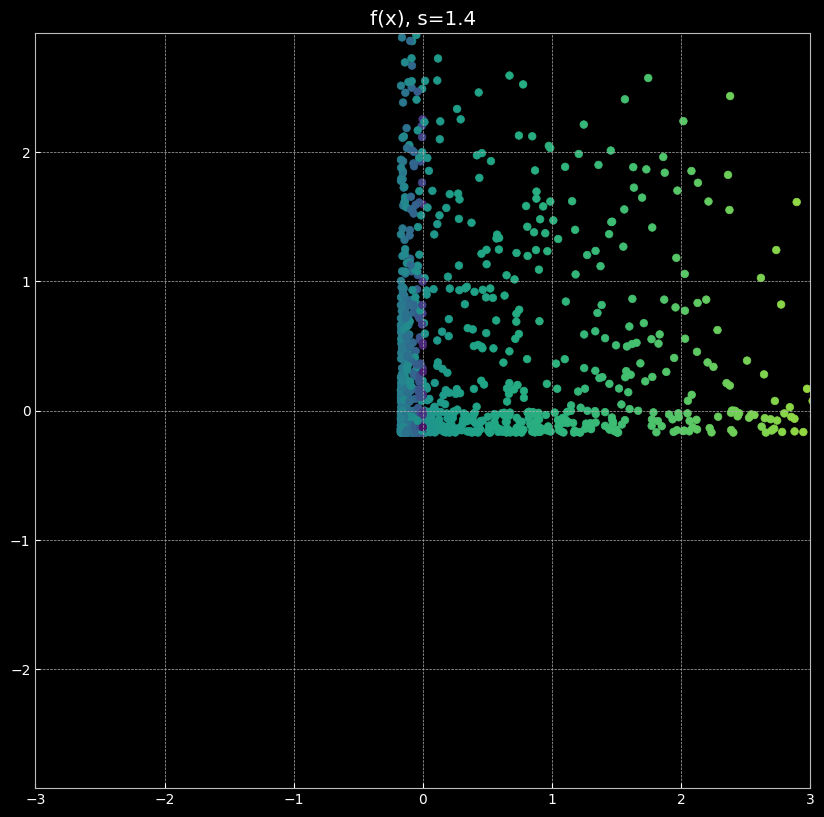

In [14]:
model = nn.Sequential(
    nn.Linear(2,2, bias=False),
    nn.GELU()
)

for s in [0.2, 0.6, 1, 1.4]:
    w = s* torch.eye(2)
    model[0].weight.data.copy_(w)
    y = model(x).data
    show_scatterplot(y, colors, title=f'f(x), s={s}')

# 4. Non-linear transformation 2 and more layers

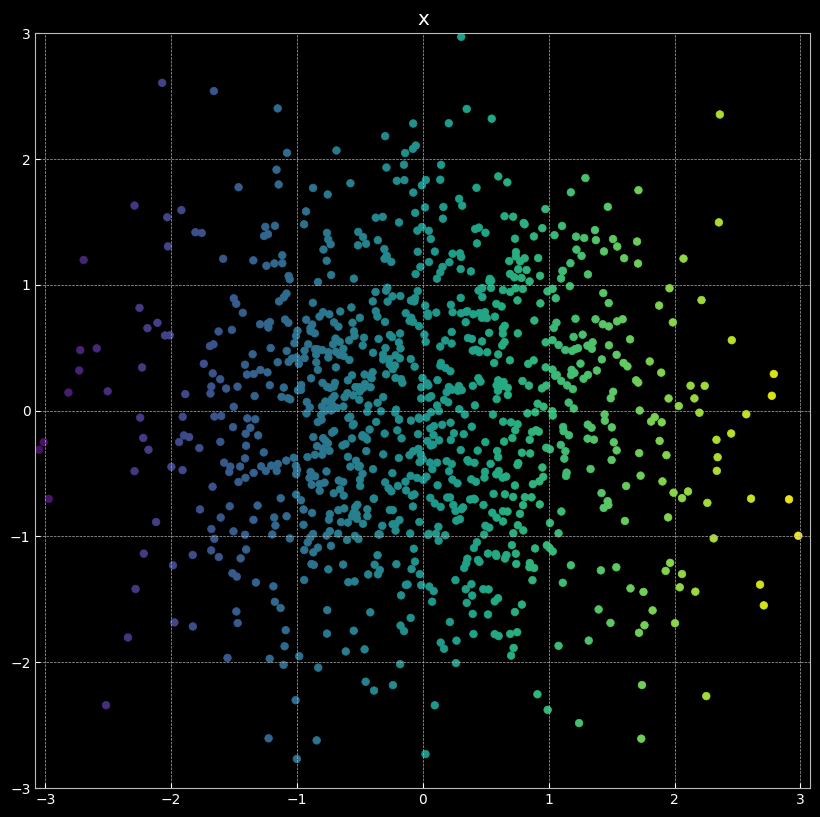

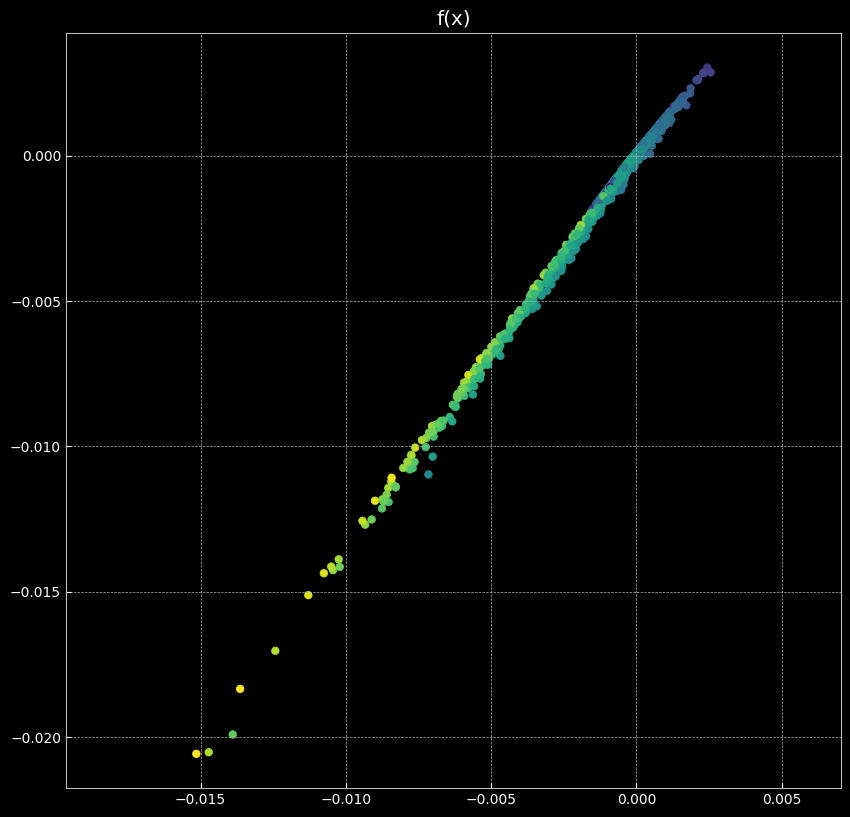

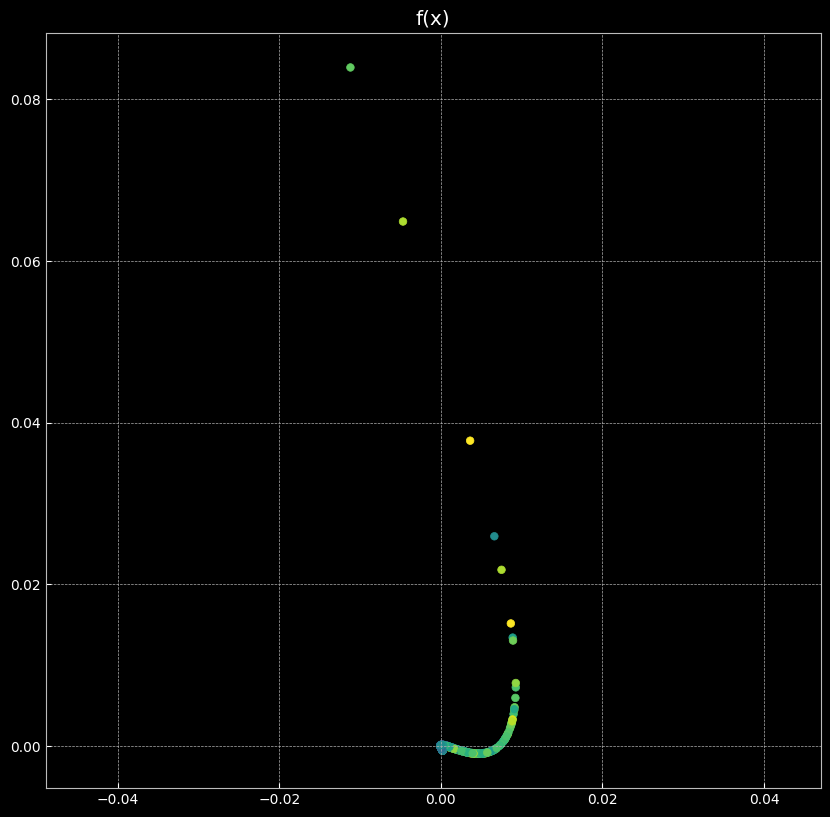

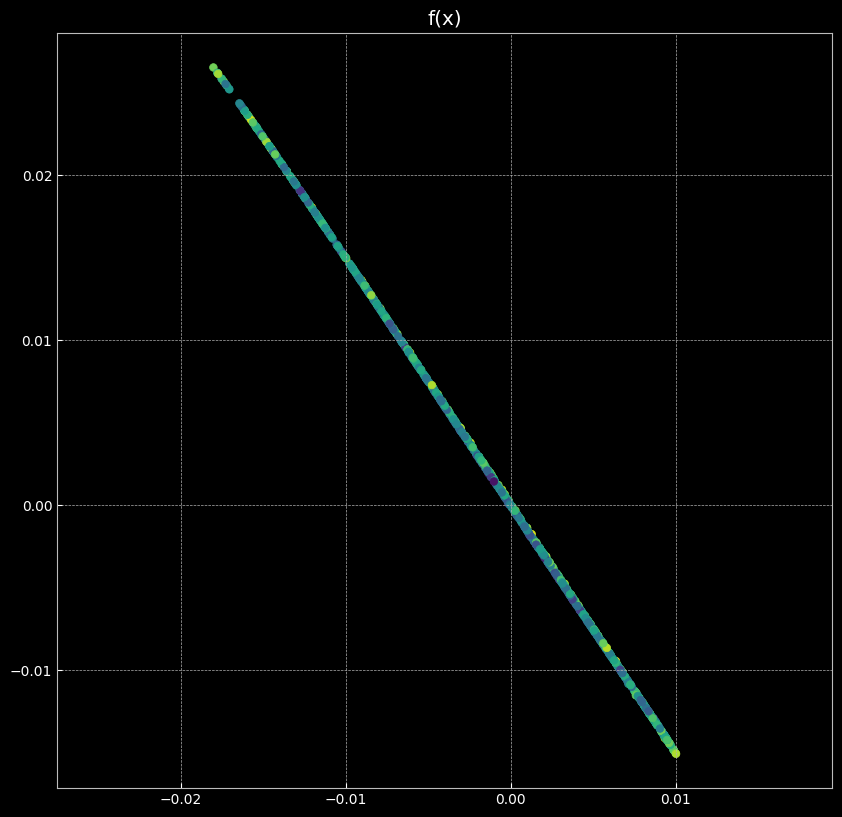

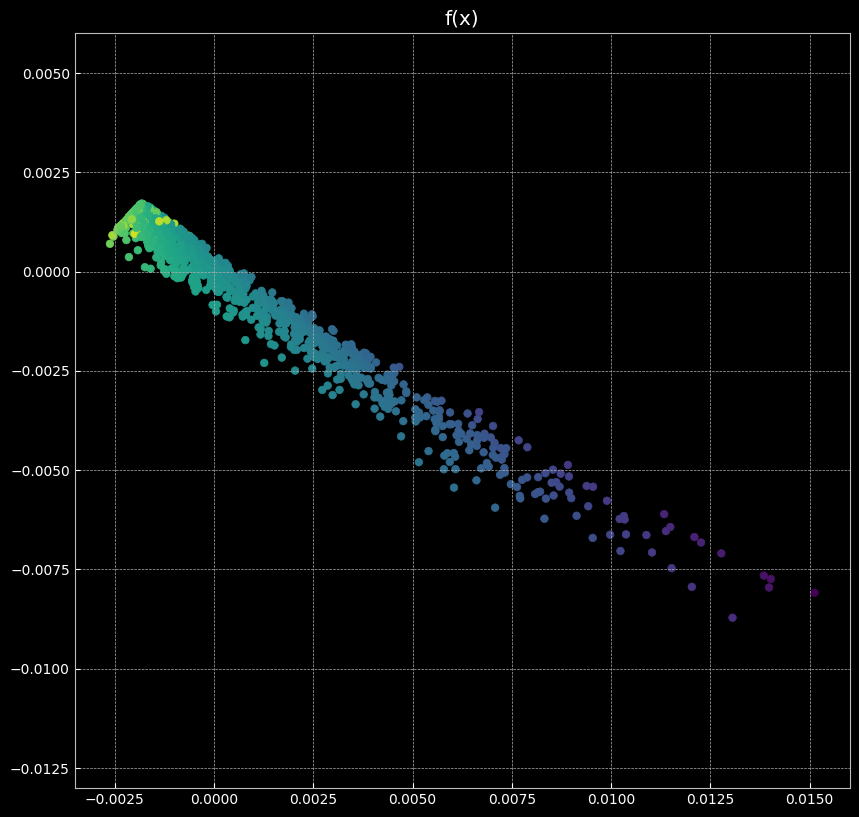

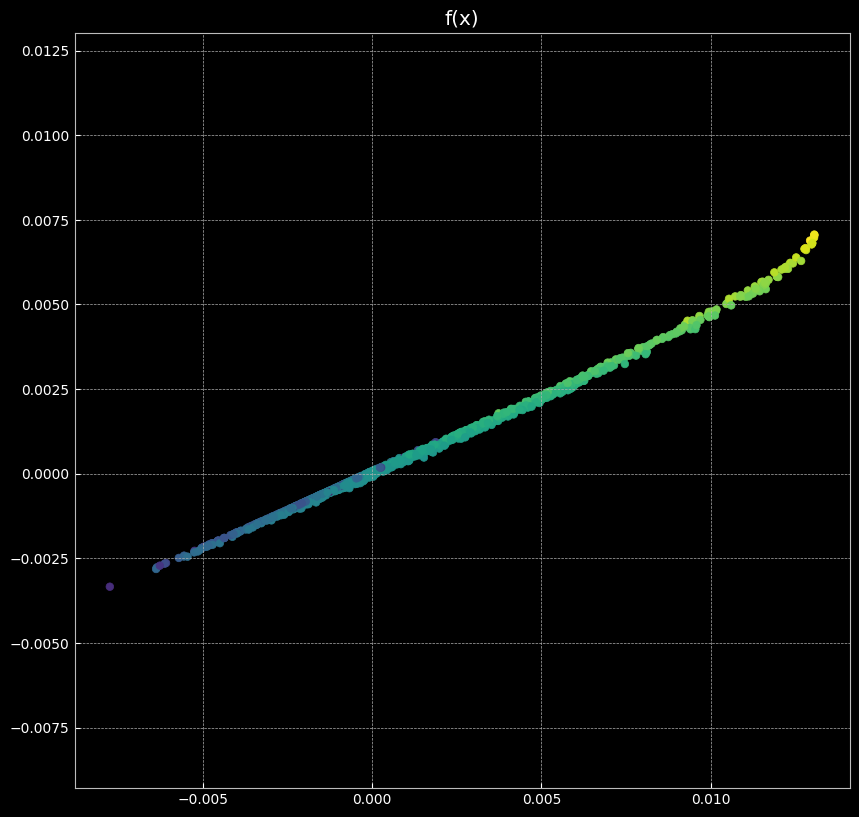

In [24]:
# deeper network with random weights
show_scatterplot(x, colors, title='x')
n_hidden = 2

# NL = nn.ReLU()
NL = nn.GELU()
# NL = nn.Tanh()
# NL = nn.Sigmoid()

add_bias = False

for i in range(5):
    model = nn.Sequential(
        nn.Linear(2, n_hidden, bias=add_bias), 
        NL, 
        nn.Linear(n_hidden, n_hidden, bias=add_bias), 
        NL, 
        nn.Linear(n_hidden, n_hidden, bias=add_bias), 
        NL, 
        nn.Linear(n_hidden, n_hidden, bias=add_bias), 
        NL, 
        nn.Linear(n_hidden, 2, bias=add_bias)
    )
    
    with torch.no_grad():
        Y = model(x).detach()
    show_scatterplot(Y, colors, title='f(x)')
    plt.axis("equal")